<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/DLQuestion1_ICP13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Source code**

In [37]:
from keras.layers import Input, Dense
from keras.models import Model

In [38]:
# This is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32  
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
# load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalize values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [40]:
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 8.5000e-04 - val_loss: 0.6958 - val_accuracy: 7.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6956 - accuracy: 8.0000e-04 - val_loss: 0.6955 - val_accuracy: 7.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 8.1667e-04 - val_loss: 0.6952 - val_accuracy: 7.0000e-04
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6950 - accuracy: 8.5000e-04 - val_loss: 0.6949 - val_accuracy: 9.0000e-04
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - accuracy: 8.8333e-04 - val_loss: 0.6946 - val_accuracy: 8.0000e-04


**Question1:**

**Add one more hidden layer to autoencoder**

In [41]:
# Importing the neccessary libraries from keras
from keras.layers import Input, Dense
from keras.models import Model

In [42]:
# this is our input placeholder
encoding_dim = 32
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding the hidden layer 32 units with 'relu' activation function
hidden_1 = Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# view the different layers of an autoencoder model
autoencoder.summary()
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# view the different layers of an encoder model
encoder.summary()
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# metrics uses for the performance of the model is accuracy
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 784)               25872     
Total params: 52,048
Trainable params: 52,048
Non-trainable params: 0
_________________________________________________________________
Model: "functional_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
__________________________

We created the encoder and the decoder.

Input image has been Encoded to 32 units and relu activation function.

Decoder has 784 units and it reconstructs the input image back to its original.
 dimension.

autoencoder used sigmoid activation function. 


In [43]:
# Reading the dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Normalizing the values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten the 28*28 into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('train samples:', x_train.shape)
print('test samples:', x_test.shape)

train samples: (60000, 784)
test samples: (10000, 784)


We normalized all values between 0 and 1 and we flatten the 28x28 images into vectors of size 784.

In [44]:
# Trained the autoencoder using the training data with 5 epochs and batch size of 256. And, also shuffle the training data.
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.0061 - val_loss: 0.6942 - val_accuracy: 0.0063
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.0065 - val_loss: 0.6941 - val_accuracy: 0.0065
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.0068 - val_loss: 0.6939 - val_accuracy: 0.0068
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.0072 - val_loss: 0.6938 - val_accuracy: 0.0069
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.0074 - val_loss: 0.6936 - val_accuracy: 0.0073


**Question 2:**

**Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotli**b

In [45]:
# Predicting an image of the test data
prediction = autoencoder.predict(x_test[[6],:])


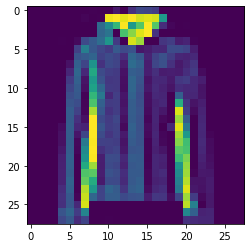

In [46]:
# input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[6].reshape(28,28))
plt.show()

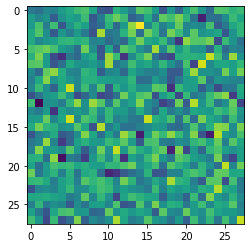

In [47]:
# Reconstructed image
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

**Question4:**

**plot loss and accuracy using the history object**

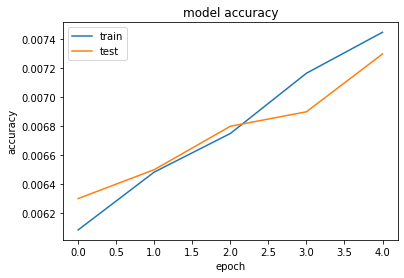

In [48]:
# Summerize the history of the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

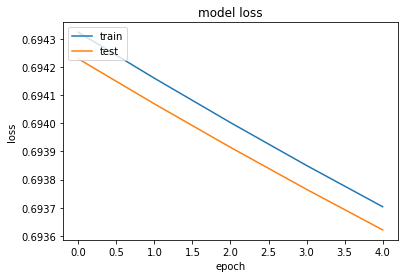

In [49]:
# Summerize the history of the Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()